**Problem statement:**
A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price.

**Objective:**
# Take advantage of all of the feature variables available below, use it to analyse and predict house prices.

# cid: a notation for a house
#dayhours: Date house was sold
#price: Price is prediction target
#room_bed: Number of Bedrooms/House
#room_bath: Number of bathrooms/bedrooms
#living_measure: square footage of the home
#lot_measure: square footage of the lot
#ceil: Total floors (levels) in house
#coast: House which has a view to a waterfront
#sight: Has been viewed
#condition: How good the condition is (Overall)
#quality: grade given to the housing unit, based on grading system
#ceil_measure: square footage of house apart from basement
#basement_measure: square footage of the basement
#yr_built: Built Year
#yr_renovated: Year when house was renovated
#zipcode: zip
#lat: Latitude coordinate
#long: Longitude coordinate
#living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
#lot_measure15: lotSize area in 2015(implies-- some renovations)
#furnished: Based on the quality of room
# total_area: Measure of both living and lot

In [1]:
#importing libraries numpy, pandas
import numpy as np
import pandas as pd


In [2]:
# importing libraries for plotting, and to ignore warnings
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
data=pd.read_csv('/content/drive/MyDrive/ML-Project(31-12-2022)/innercity.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML-Project(31-12-2022)/innercity.csv'

In [ ]:
# printing first 5 columns
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [ ]:
# printing shape of dataset
data.shape

(21613, 23)

In [ ]:
# printing the columns included in dataset
data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [ ]:
# printing data types in dataset
data.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [ ]:
# printing information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
# printing if columns have any null values
data.isnull().any()

cid                 False
dayhours            False
price               False
room_bed            False
room_bath           False
living_measure      False
lot_measure         False
ceil                False
coast               False
sight               False
condition           False
quality             False
ceil_measure        False
basement            False
yr_built            False
yr_renovated        False
zipcode             False
lat                 False
long                False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
dtype: bool

In [ ]:
# printing sum of total null values in columns
data.isna().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [ ]:
# decribing the data and transforse the table
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
# importing seaborn libraries for plotting 
import seaborn as sns

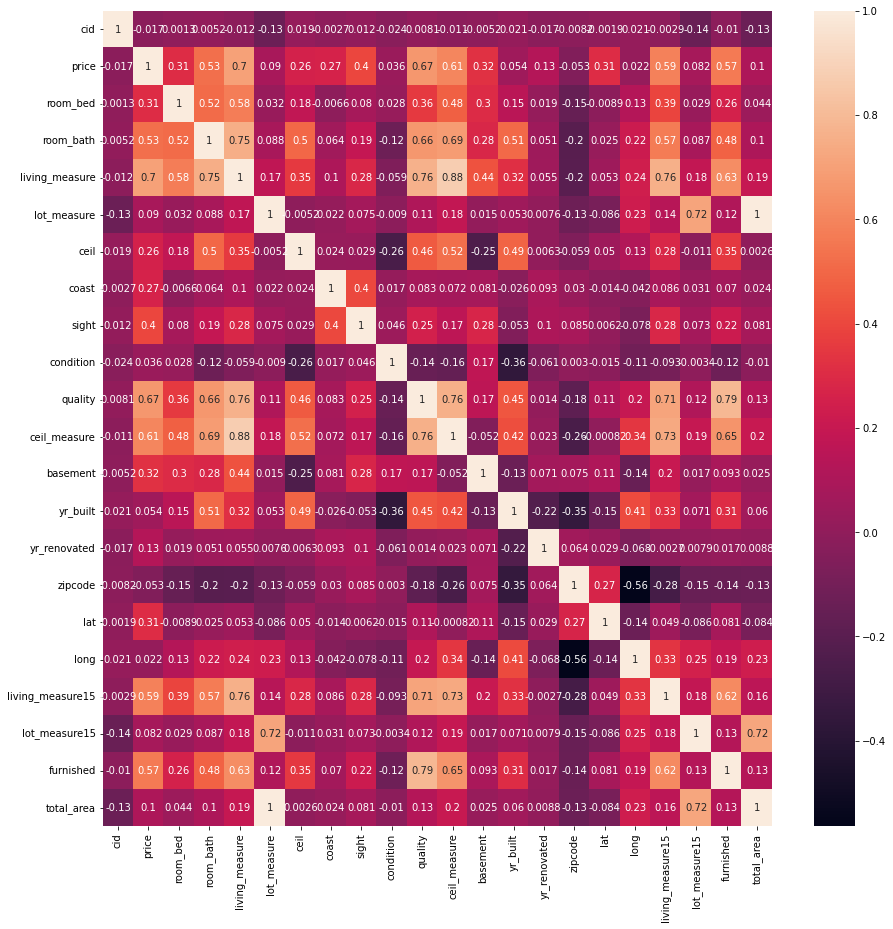

In [ ]:
# finding corelation of features using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

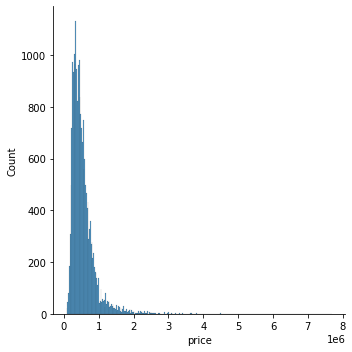

In [ ]:
# plotting target column
sns.displot(data['price'])

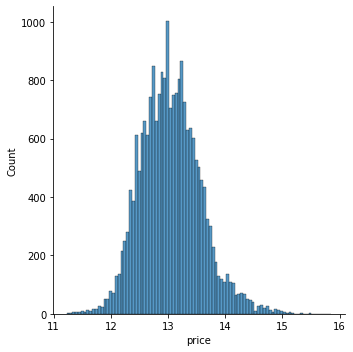

In [ ]:
# plotting target column and log the target column for normalising the target column
sns.displot(np.log(data['price']))

In [ ]:
# corelation between target column and other column
data.corr()['price']

cid                -0.016797
price               1.000000
room_bed            0.308338
room_bath           0.525134
living_measure      0.702044
lot_measure         0.089655
ceil                0.256786
coast               0.266331
sight               0.397346
condition           0.036392
quality             0.667463
ceil_measure        0.605566
basement            0.323837
yr_built            0.053982
yr_renovated        0.126442
zipcode            -0.053168
lat                 0.306919
long                0.021571
living_measure15    0.585374
lot_measure15       0.082456
furnished           0.565991
total_area          0.104796
Name: price, dtype: float64

In [ ]:
# converting dayhours column to normal format
data['dayhours'] = data['dayhours'].astype('datetime64[ns]').astype('int64')
data.dayhours.dtypes # to change data type object to int.

dtype('int64')

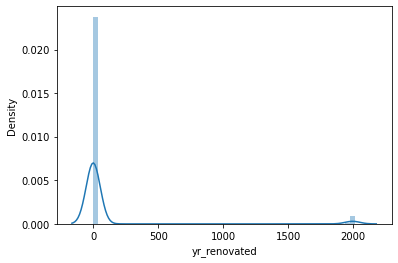

In [ ]:
sns.distplot(data['yr_renovated'])

In [ ]:
# there so many houses which are not renovated so we category to 0 and 1
rennovated=[0 if values==0 else 1 for values in data.yr_renovated]
data['yr_renovated']=rennovated
data.yr_renovated.value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

In [ ]:
# taking value counts of room_bed column
data['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
33       1
11       1
Name: room_bed, dtype: int64

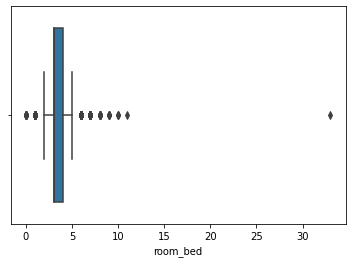

In [ ]:
#plotting 
sns.boxplot(x='room_bed',data=data)

Plotting every column using distplot for understanding and getting information. 

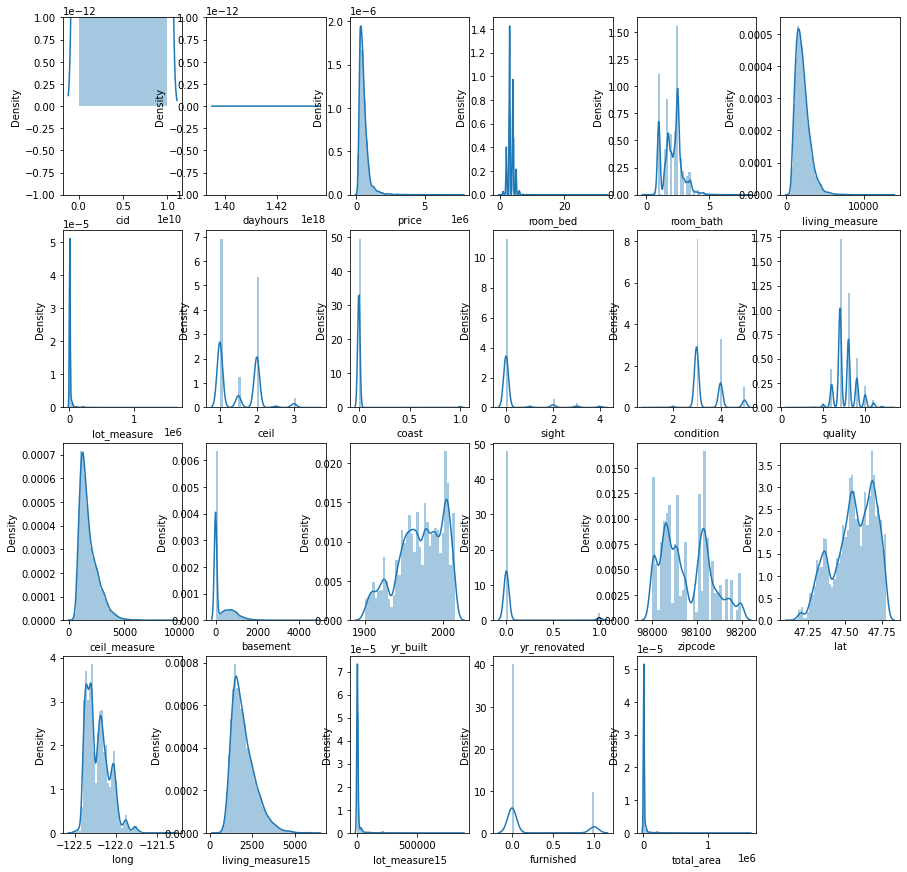

In [ ]:
plt.figure(figsize=(15,15))
pos=1
for i in data.columns:
  plt.subplot(4,6,pos)
  sns.distplot(data[i])
  pos=pos+1

In [ ]:
# droping unwanted column using drop command
data1=data.drop(['cid','dayhours'],axis=1)

In [ ]:
# after dropping the columns printing columns present in dataset
data1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

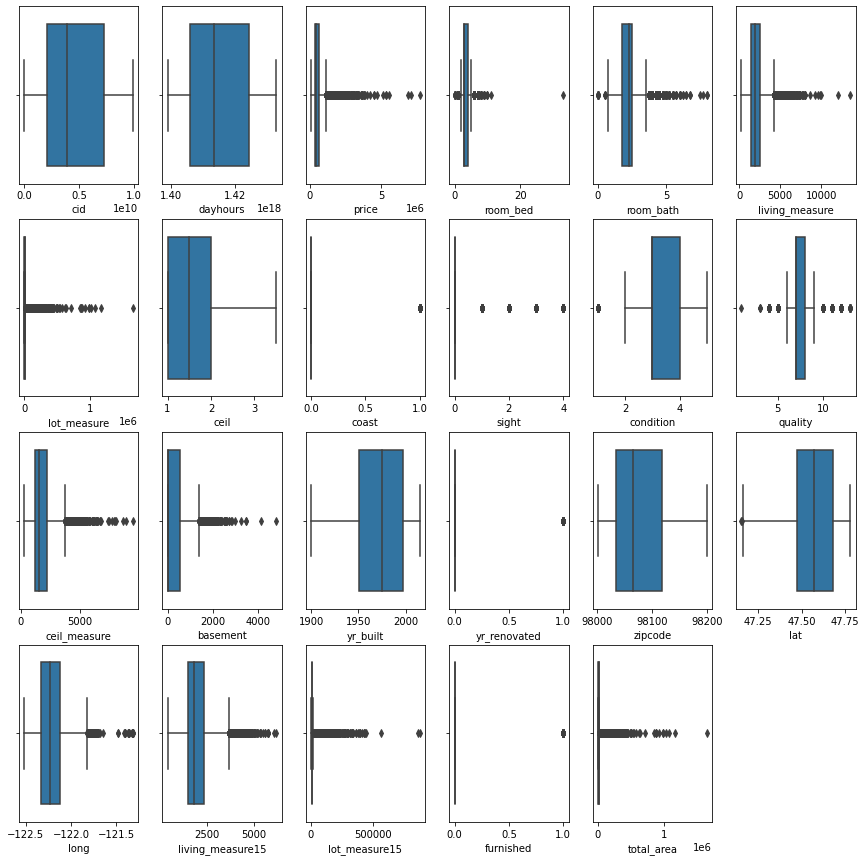

In [ ]:
# plotting columns using boxplot for better understanding of outliers present in or not
plt.figure(figsize=(15,15))
pos=1
for i in data.columns:
  plt.subplot(4,6,pos)
  sns.boxplot(data[i])
  pos=pos+1

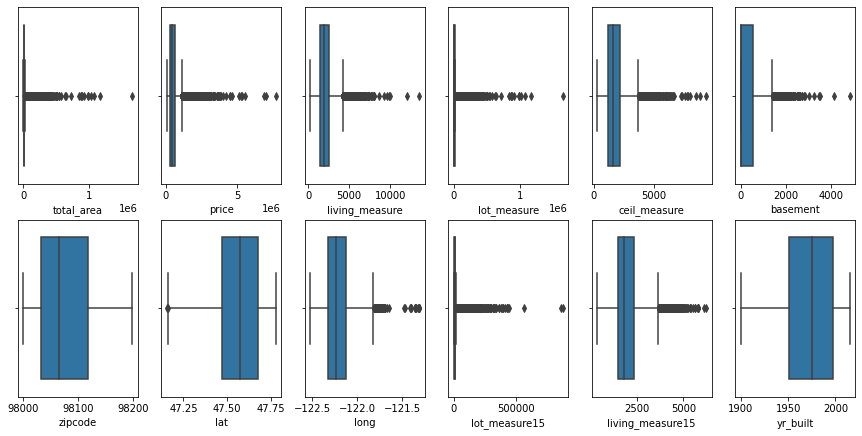

In [ ]:
# taking continous columns to another dataset for visualizing
data_con=data1[['total_area','price','living_measure','lot_measure','ceil_measure','basement','zipcode','lat','long','lot_measure15','living_measure15','yr_built']]
plt.figure(figsize=(15,15))
pos=1
for i in data_con.columns:
  plt.subplot(4,6,pos)
  sns.boxplot(data_con[i])
  pos=pos+1

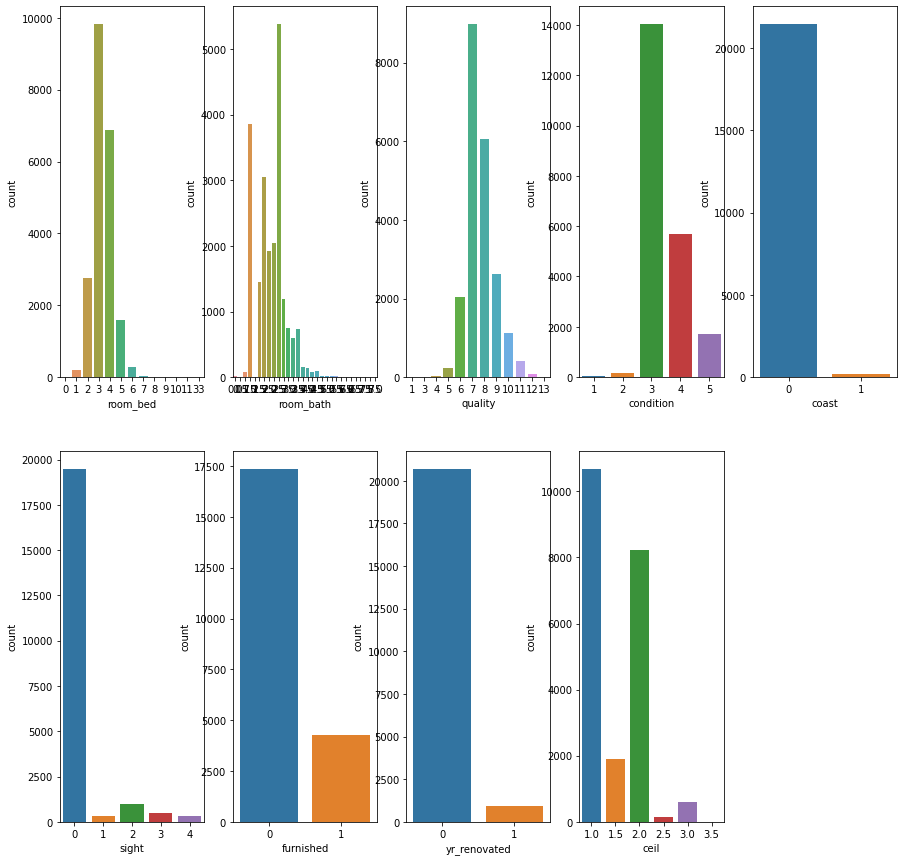

In [ ]:
# taking catgeorical columns to another dataset for visualizing
data_cat=data[['room_bed','room_bath','quality','condition','coast','sight','furnished','yr_renovated','ceil']]
plt.figure(figsize=(15,15))
pos=1
for i in data_cat.columns:
  plt.subplot(2,5,pos)
  sns.countplot(data_cat[i])
  pos=pos+1

Doing some preprocessing for some columns in categorical columns

In [ ]:
data_cat['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
33       1
11       1
Name: room_bed, dtype: int64

In [ ]:
data_cat['room_bed'].where(~(data_cat['room_bed']>6),other=np.nan,inplace=True)
data_cat['room_bed'].value_counts()

3.0    9824
4.0    6882
2.0    2760
5.0    1601
6.0     272
1.0     199
0.0      13
Name: room_bed, dtype: int64

In [ ]:
data_cat['room_bed']=data_cat['room_bed'].fillna(data_cat['room_bed'].mode()[0])

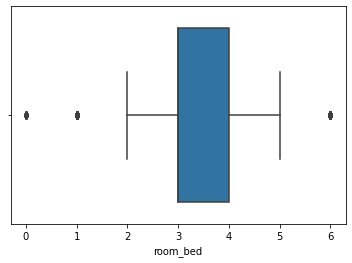

In [ ]:
sns.boxplot(data_cat['room_bed'])

In [ ]:
data['room_bath'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.75       2
6.25       2
6.50       2
8.00       2
7.75       1
7.50       1
Name: room_bath, dtype: int64

In [ ]:
data_cat['room_bath'].where(~(data_cat['room_bath']>5),other=np.nan,inplace=True)
data_cat['room_bath'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
0.00      10
1.25       9
0.50       4
Name: room_bath, dtype: int64

In [ ]:
data_cat['room_bath']=data_cat['room_bath'].fillna(data_cat['room_bath'].mode()[0])

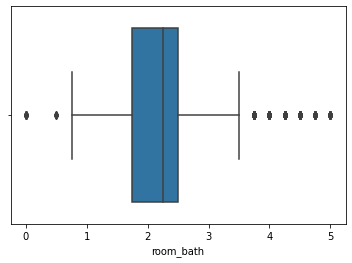

In [ ]:
sns.boxplot(data_cat['room_bath'])

In [ ]:
data_cat['quality'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

In [ ]:
data_cat['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
data_cat['coast'].value_counts()

0    21450
1      163
Name: coast, dtype: int64

In [ ]:
data_cat['sight'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64

In [ ]:
data_cat['furnished'].value_counts()

0    17362
1     4251
Name: furnished, dtype: int64

In [ ]:
data_con.columns

Index(['total_area', 'price', 'living_measure', 'lot_measure', 'ceil_measure',
       'basement', 'zipcode', 'lat', 'long', 'lot_measure15',
       'living_measure15', 'yr_built'],
      dtype='object')

In [ ]:
#checking value_counts for continuous columns
for i in data_con.columns:
  data[i].value_counts()
  print(data[i])

0        16477
1        10050
2         6694
3         4664
4         5450
         ...  
21608     6129
21609     8490
21610     8317
21611    16440
21612     6892
Name: total_area, Length: 21613, dtype: int64
0        808100
1        277500
2        404000
3        300000
4        699000
          ...  
21608    300000
21609    320000
21610    483453
21611    365000
21612    354950
Name: price, Length: 21613, dtype: int64
0        3020
1        2550
2        2370
3         820
4        1400
         ... 
21608    2303
21609    3490
21610    2790
21611    1440
21612     970
Name: living_measure, Length: 21613, dtype: int64
0        13457
1         7500
2         4324
3         3844
4         4050
         ...  
21608     3826
21609     5000
21610     5527
21611    15000
21612     5922
Name: lot_measure, Length: 21613, dtype: int64
0        3020
1        1750
2        2370
3         820
4        1400
         ... 
21608    2303
21609    3490
21610    2790
21611    1440
21612     970
Na

In [ ]:
# joining continuous column and categorical column 
df=pd.concat([data_con,data_cat],axis=1,join='inner')

Preprocessing whole dataset.  
treating outliers.       
checking and removing outliers using Z-score

In [ ]:
# importing stats libray for statstical operations
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

       total_area     price  living_measure  lot_measure  ceil_measure  \
0        0.017069  0.729318        1.023606     0.039835      1.487322   
1        0.171608  0.715066        0.511858     0.183656      0.046362   
2        0.252304  0.370711        0.315869     0.260335      0.702366   
3        0.301116  0.653817        1.371813     0.271924      1.169453   
4        0.282217  0.432329        0.740293     0.266950      0.469030   
...           ...       ...             ...          ...           ...   
21608    0.265890  0.653817        0.242918     0.272359      0.621455   
21609    0.209119  0.599374        1.535355     0.244014      2.054905   
21610    0.213279  0.154427        0.773176     0.231291      1.209568   
21611    0.017959  0.476876        0.696740     0.002583      0.420725   
21612    0.247543  0.504234        1.208489     0.221754      0.988309   

       basement   zipcode       lat      long  lot_measure15  ...  yr_built  \
0      0.658681  1.029090  1.135

In [ ]:
# assinging  thershold
threshold = 3
print(np.where(z > 3))

(array([   13,    14,    20, ..., 21590, 21607, 21610]), array([19,  5, 19, ...,  9, 12,  8]))


In [ ]:
# Inter Quartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

total_area            5965.000
price               323050.000
living_measure        1123.000
lot_measure           5648.000
ceil_measure          1020.000
basement               560.000
zipcode                 85.000
lat                      0.207
long                     0.203
lot_measure15         4983.000
living_measure15       870.000
yr_built                46.000
room_bed                 1.000
room_bath                0.750
quality                  1.000
condition                1.000
coast                    0.000
sight                    0.000
furnished                0.000
yr_renovated             0.000
ceil                     1.000
dtype: float64


In [ ]:
df1 = df[(z < 3).all(axis=1)]

In [ ]:
df1.shape

(18564, 21)

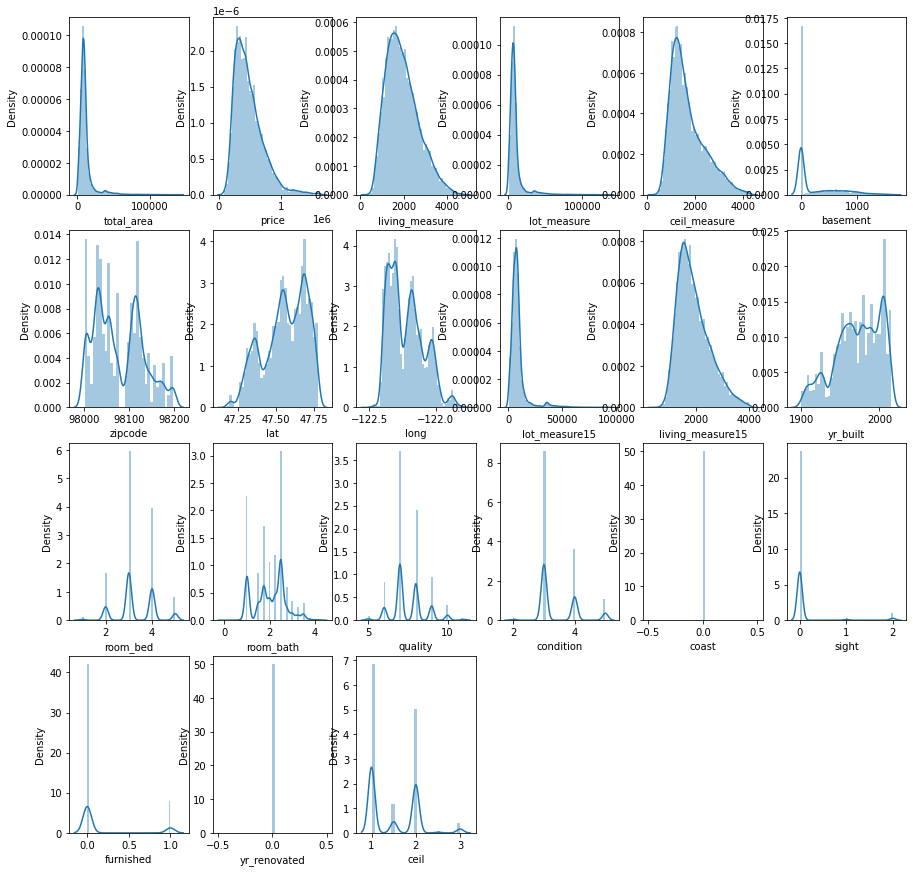

In [ ]:
# after treating outliers
plt.figure(figsize=(15,15))
pos=1
for i in df1.columns:
  plt.subplot(4,6,pos)
  sns.distplot(df1[i])
  pos=pos+1

In [ ]:
df1.shape

(18564, 21)

In [ ]:
df1.columns

Index(['total_area', 'price', 'living_measure', 'lot_measure', 'ceil_measure',
       'basement', 'zipcode', 'lat', 'long', 'lot_measure15',
       'living_measure15', 'yr_built', 'room_bed', 'room_bath', 'quality',
       'condition', 'coast', 'sight', 'furnished', 'yr_renovated', 'ceil'],
      dtype='object')

In [ ]:
df1.head()

,total_area,price,living_measure,lot_measure,ceil_measure,basement,zipcode,lat,long,lot_measure15,...,yr_built,room_bed,room_bath,quality,condition,coast,sight,furnished,yr_renovated,ceil
0,16477,808100,3020,13457,3020,0,98133,47.7174,-122.336,7553,...,1956,4.0,3.25,9,5,0,0,1,0,1.0
1,10050,277500,2550,7500,1750,800,98023,47.3165,-122.386,8800,...,1976,4.0,2.50,8,3,0,0,0,0,1.0
2,6694,404000,2370,4324,2370,0,98038,47.3515,-121.999,4348,...,2006,3.0,2.50,8,3,0,0,0,0,2.0
3,4664,300000,820,3844,820,0,98133,47.7049,-122.349,3844,...,1916,2.0,1.00,6,4,0,0,0,0,1.0
4,5450,699000,1400,4050,1400,0,98115,47.6768,-122.269,5940,...,1954,2.0,1.50,8,4,0,0,0,0,1.0


In [ ]:
# importing libraries for train_test_split  and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#finding corelation with target column
df1.corr()['price']

total_area          0.138271
price               1.000000
living_measure      0.621948
lot_measure         0.100190
ceil_measure        0.532881
basement            0.210237
zipcode            -0.042882
lat                 0.427719
long                0.077889
lot_measure15       0.092882
living_measure15    0.552321
yr_built            0.067510
room_bed            0.301839
room_bath           0.442488
quality             0.634880
condition           0.049767
coast                    NaN
sight               0.182702
furnished           0.548448
yr_renovated             NaN
ceil                0.276117
Name: price, dtype: float64

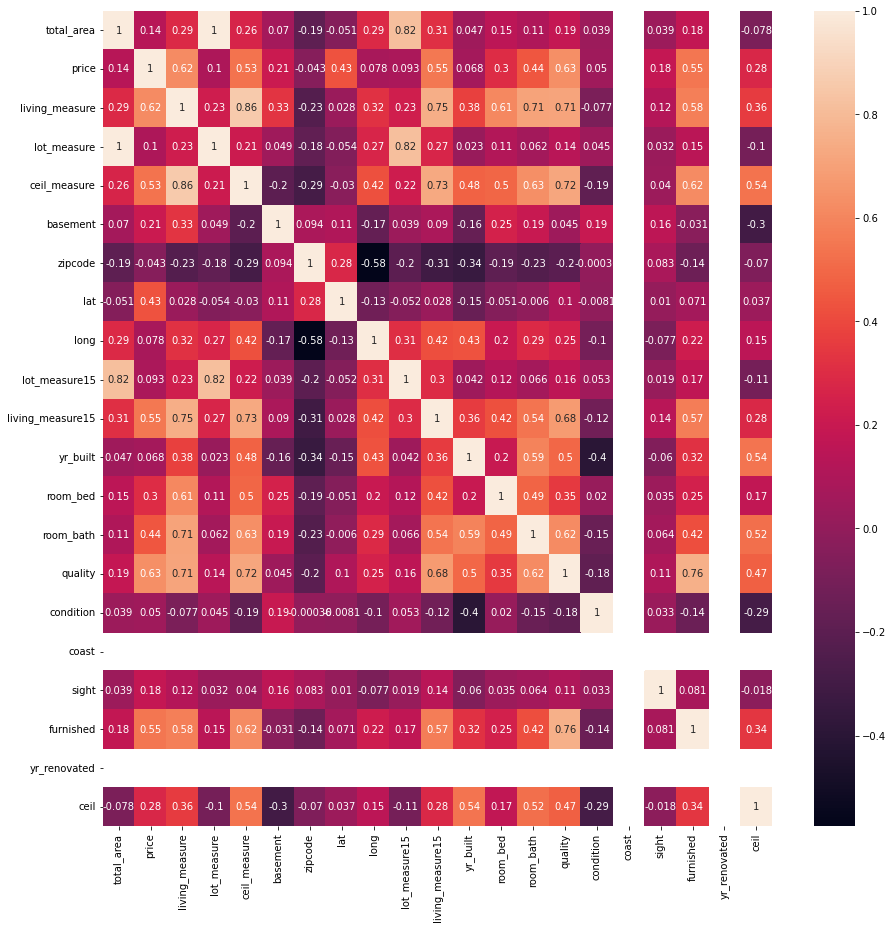

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)

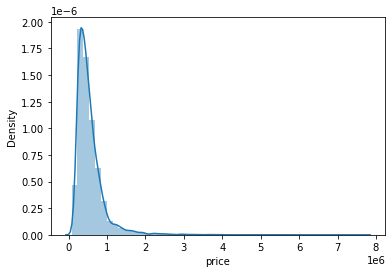

In [ ]:
sns.distplot(data['price'])

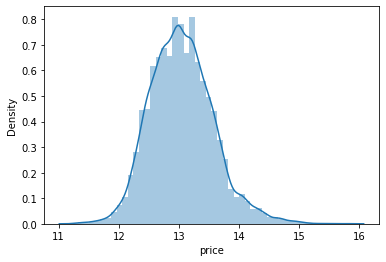

In [ ]:

sns.distplot(np.log(data['price']))

In [ ]:
# droping columns which no corelation with target column
df1=df1.drop(['coast','yr_renovated'],axis=1)

In [ ]:
# spliting into X and y
X=df1.drop(['price'],axis=1)
y=np.log(df1['price'])


In [ ]:
# scaling  X
sc=StandardScaler()
sc.fit_transform(X)

array([[ 0.41271118,  1.46289186,  0.3246181 , ..., -0.22725177,
         2.30807243, -0.89171007],
       [-0.14543359,  0.82419793, -0.20145303, ..., -0.22725177,
        -0.43326197, -0.89171007],
       [-0.43688121,  0.57959175, -0.48193011, ..., -0.22725177,
        -0.43326197,  0.95848616],
       ...,
       [-0.28090984,  2.10158579, -0.42223159, ..., -0.22725177,
        -0.43326197,  0.95848616],
       [ 0.40949796, -0.68420688,  0.46088263, ..., -0.22725177,
        -0.43326197, -0.89171007],
       [-0.41968615, -1.3229008 , -0.34080846, ..., -0.22725177,
        -0.43326197,  0.03338805]])

In [ ]:
# spliting into train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# importing libraries for cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# importing libraries for implementing libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [ ]:
models = {}
models["Linear"]        = LinearRegression()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["Lasso"]         = Lasso()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import r2_score
# function for performing model creation
def model_(model,X_train,y_train,X_test,y_test):
  crv=KFold(n_splits=5)
  scores=[]
  score = cross_val_score(model,X_train,y_train,cv=crv) 
  scores.append(score)
  m=model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  #print('K-Fold scores :',score)
  #print('Average of total score :',np.mean(score))
  avg = np.mean(score)
  r2=r2_score(y_test,y_pred)
  m2= mean_absolute_error(y_test,y_pred)
  ms2= mean_squared_error(y_test,y_pred)
  print("r2 score:",r2)
  print("mean_absolute_error: ",m2)
  print("mean_squared_error: ",ms2)
  return score,avg,r2,m2,ms2

In [ ]:
s_linear,s1_avg,r2_l,m2_l,ms2_l=model_(LinearRegression(),X_train,y_train,X_test,y_test)
s_linear,s1_avg

r2 score: 0.7245475668954943
mean_absolute_error:  0.18831142969058332
mean_squared_error:  0.05835616567156081


(array([0.72944035, 0.73807688, 0.72020813, 0.71689612, 0.72908232]),
 0.7267407604755002)

In [ ]:
s_Decision,s2_avg,r2_d,m2_d,ms2_d = model_(DecisionTreeRegressor(),X_train,y_train,X_test,y_test)
s_Decision,s2_avg

r2 score: 0.7324968532803857
mean_absolute_error:  0.17007858873524012
mean_squared_error:  0.056672064108110806


(array([0.73924443, 0.75176604, 0.73308799, 0.72921756, 0.74816101]),
 0.7402954062307994)

In [ ]:
s_Random,s3_avg,r2_r,m2_r,ms2_r = model_(RandomForestRegressor(),X_train,y_train,X_test,y_test)
s_Random,s3_avg

r2 score: 0.8688236641749705
mean_absolute_error:  0.11832433143451686
mean_squared_error:  0.02779045332552739


(array([0.87794515, 0.8727332 , 0.865751  , 0.86939706, 0.8723145 ]),
 0.8716281809289033)

In [ ]:
s_SV,s4_avg,r2_s,m2_s,ms2_s = model_(SVR(),X_train,y_train,X_test,y_test)
s_SV,s4_avg

r2 score: 0.44080568457292757
mean_absolute_error:  0.28132914816792304
mean_squared_error:  0.11846849833879172


(array([0.41813291, 0.42948929, 0.42760975, 0.4206978 , 0.43000225]),
 0.42518639918823214)

In [ ]:
s_AdaBoost,s5_avg,r2_a,m2_a,ms2_a = model_(AdaBoostRegressor(),X_train,y_train,X_test,y_test)
s_AdaBoost,s5_avg

r2 score: 0.7645065071620014
mean_absolute_error:  0.17276070565772478
mean_squared_error:  0.04989063675257104


(array([0.78274609, 0.78968778, 0.76728634, 0.76204844, 0.76434372]),
 0.7732224753144233)

In [ ]:
s_Gradient,s6_avg,r2_g,m2_g,ms2_g = model_(GradientBoostingRegressor(),X_train,y_train,X_test,y_test)
s_Gradient,s6_avg

r2 score: 0.8588683721269572
mean_absolute_error:  0.12668037059381426
mean_squared_error:  0.02989953860575152


(array([0.86286422, 0.86082593, 0.85357166, 0.8583933 , 0.85927168]),
 0.8589853597301665)

In [ ]:
s_Lass,s7_avg,r2_la,m2_la,ms2_la = model_(Lasso(),X_train,y_train,X_test,y_test)
s_Lass,s7_avg

r2 score: 0.4406433995176502
mean_absolute_error:  0.2835230174197713
mean_squared_error:  0.11850287935138633


(array([0.43161034, 0.4344064 , 0.43110555, 0.43134342, 0.43581689]),
 0.432856519638789)

In [ ]:
s_Neighbour,s8_avg,r2_n,m2_n,ms2_n = model_(KNeighborsRegressor(),X_train,y_train,X_test,y_test)
s_Neighbour,s8_avg

r2 score: 0.42101154985753164
mean_absolute_error:  0.27792959691415525
mean_squared_error:  0.12266199843518984


(array([0.41842171, 0.40272803, 0.39688179, 0.40618482, 0.43313862]),
 0.41147099395947284)

In [ ]:
# creating dictionary
d={'model':['Linear','SVR','AdaBoost','RandomForest','Lasso','KNN','Gradient','Decision'],
   'Average_score':[s1_avg,s4_avg,s5_avg,s3_avg,s7_avg,s8_avg,s6_avg,s2_avg],
   'R2 score':[r2_l,r2_s,r2_a,r2_r,r2_la,r2_n,r2_g,r2_d],
   'mean absolute error':[m2_l,m2_s,m2_a,m2_r,m2_la,m2_n,m2_g,m2_d],
   'mean squared error':[ms2_l,ms2_s,ms2_a,ms2_r,ms2_la,ms2_n,ms2_g,ms2_d]}

In [ ]:
#creating dataframe
Result=pd.DataFrame(d)

In [ ]:
Result

,model,Average_score,R2 score,mean absolute error,mean squared error
0,Linear,0.726741,0.724548,0.188311,0.058356
1,SVR,0.425186,0.440806,0.281329,0.118468
2,AdaBoost,0.773222,0.764507,0.172761,0.049891
3,RandomForest,0.871628,0.868824,0.118324,0.027790
4,Lasso,0.432857,0.440643,0.283523,0.118503
5,KNN,0.411471,0.421012,0.277930,0.122662
6,Gradient,0.858985,0.858868,0.126680,0.029900
7,Decision,0.740295,0.732497,0.170079,0.056672


In [ ]:
Result.sort_values(by=['Average_score'],ascending=False)

,model,Average_score,R2 score,mean absolute error,mean squared error
3,RandomForest,0.871628,0.868824,0.118324,0.027790
6,Gradient,0.858985,0.858868,0.126680,0.029900
2,AdaBoost,0.773222,0.764507,0.172761,0.049891
7,Decision,0.740295,0.732497,0.170079,0.056672
0,Linear,0.726741,0.724548,0.188311,0.058356
4,Lasso,0.432857,0.440643,0.283523,0.118503
1,SVR,0.425186,0.440806,0.281329,0.118468
5,KNN,0.411471,0.421012,0.277930,0.122662


from the above models Random forest regressor have good r2 score, less mean absolute error and mean squared error.

In [ ]:
# importing libraries for GridSearchCv
from sklearn.model_selection import GridSearchCV

In [ ]:
# hyper parameter tuning
p_grid={'n_estimators':[25,50,100],'criterion':['squared_error', 'absolute_error'],'max_depth':[25,30]}

In [ ]:

grid_cv=GridSearchCV(RandomForestRegressor(n_estimators=100,max_depth=25,criterion='squared_error'),p_grid,cv=10)

In [ ]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(max_depth=25),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [25, 30], 'n_estimators': [25, 50, 100]})

In [ ]:
print(grid_cv.best_params_)

{'criterion': 'squared_error', 'max_depth': 25, 'n_estimators': 100}


In [ ]:
train_score=grid_cv.score(X_train,y_train)

In [ ]:
test_score=grid_cv.score(X_test,y_test)

In [ ]:
train_score

0.979285136241015

In [ ]:
test_score

0.8681475112254646

In [ ]:
y_pred=grid_cv.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test,y_pred)
me=mean_absolute_error(y_test,y_pred)
ms=mean_squared_error(y_test,y_pred)
print('r2 score: ', r2)
print('mean absolute error: ',me)
print('mean squared error: ',ms)

r2 score:  0.8681475112254646
mean absolute error:  0.1185546126303835
mean squared error:  0.027933700176157695


Conclusion

In [ ]:
Random Forest regressor have good Accuracy score